# **CLASSIC BOOKS RECOMMENDATION SYSTEM**
![alt text](https://static.onecms.io/wp-content/uploads/sites/23/2014/06/10/stack-of-classic-novels.jpg)<br>
<p>Classic literature is an expression of life, truth, and beauty. In classic literature, a work is usually considered to be a representation of the period in which it was written—and it merits lasting recognition. In other words, if the book was published in the recent past, it is not a classic; while the term "modern classic" may apply to books written after World War II, they need longevity to achieve the designation of a simple "classic".</p>

<p>In this project, a <strong>content based recommendation system</strong> will be made using the contents of classic books. The data used comes from <a href="https://www.gutenberg.org/" target="_blank">Project Gutenberg</a>. The data taken are 50 classic books.</p>

In [1]:
# Import library
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.corpora.dictionary import Dictionary

[nltk_data] Downloading package punkt to C:\Users\Nailatul
[nltk_data]     Fadhilah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nailatul
[nltk_data]     Fadhilah\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# The books files are contained in this folder
folder = "Classic Books Dataset/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder+"/*.txt")

files.sort()
files

['Classic Books Dataset\\A Christmas Carol in Prose.txt',
 'Classic Books Dataset\\A Dictionary of Cebuano Visayan.txt',
 "Classic Books Dataset\\A Doll's House.txt",
 'Classic Books Dataset\\A History of the Philippines.txt',
 'Classic Books Dataset\\A Modest Proposal.txt',
 'Classic Books Dataset\\A Tale of Two Cities.txt',
 'Classic Books Dataset\\Adventures of Huckleberry Finn.txt',
 "Classic Books Dataset\\Alice's Adventures in Wonderland.txt",
 'Classic Books Dataset\\Anthem.txt',
 'Classic Books Dataset\\Beowulf An Anglo-Saxon Epic Poem.txt',
 'Classic Books Dataset\\Dracula.txt',
 'Classic Books Dataset\\Dubliners.txt',
 'Classic Books Dataset\\Emma.txt',
 'Classic Books Dataset\\Frankenstein.txt',
 'Classic Books Dataset\\Great Expectations.txt',
 "Classic Books Dataset\\Grimms' Fairy Tales.txt",
 'Classic Books Dataset\\Heart of Darkness.txt',
 'Classic Books Dataset\\Jane Eyre An Autobiography.txt',
 'Classic Books Dataset\\Leviathan.txt',
 'Classic Books Dataset\\Little Wom

## Load the contents of each book
<p>As a first step, we need to load the content of these books into Python and do some basic pre-processing to facilitate the downstream analyses. We call such a collection of texts <strong>a corpus</strong>. We will also store the titles for these books for future reference and print their respective length to get a gauge for their contents.</p>

In [3]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters
    text = re.sub('[\W_]',' ' , f.read())
    # Store the texts and titles of the books in two separate lists
    txts.append(text)
    titles.append(os.path.basename(n).replace(".txt", ""))

# Print the length, in characters, of each book
[len(t) for t in txts]

[162256,
 5539690,
 145861,
 499932,
 19832,
 773087,
 586585,
 147956,
 110192,
 280066,
 863133,
 377674,
 899284,
 428492,
 1014988,
 529904,
 213802,
 1050553,
 1235138,
 1033789,
 121183,
 1240448,
 228268,
 263173,
 770407,
 192804,
 686310,
 221294,
 574084,
 402275,
 366957,
 178606,
 361434,
 1124149,
 122542,
 70887,
 13761,
 594893,
 442187,
 286063,
 1219352,
 991894,
 405721,
 141349,
 233011,
 32338,
 371791,
 1026898,
 644831,
 3273930]

## Exploratory Data Analysis

### Bigram distribution

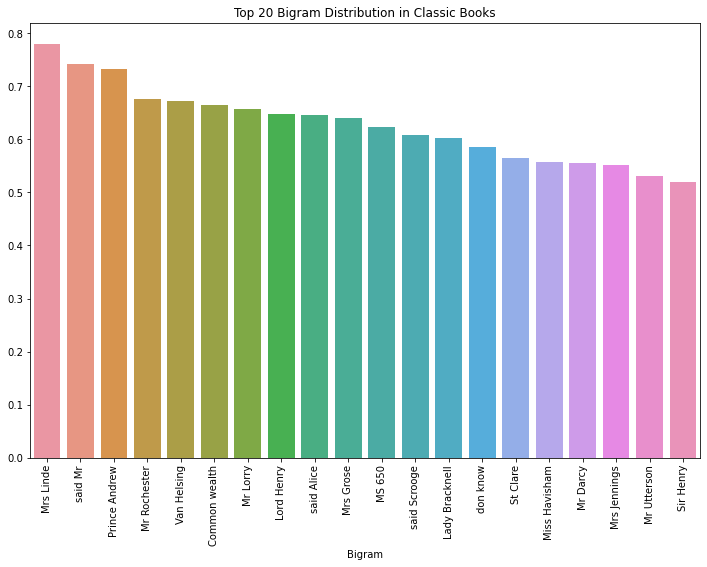

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(txts)
total_words = tfidf_matrix.sum(axis=0) 

# Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

# Converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 

# Taking first 20 records
bigram = bigram.head(20)
# Plotting the bigram distribution
plt.figure(figsize=(12,8))
ax = sns.barplot(x='bigram', y='count', data=bigram)
ax.set_title('Top 20 Bigram Distribution in Classic Books')
ax.set_xlabel('Bigram')
ax.set_ylabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


### Most frequent part-of-speech

In [5]:
# Create blob
blob = TextBlob(str(txts))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])

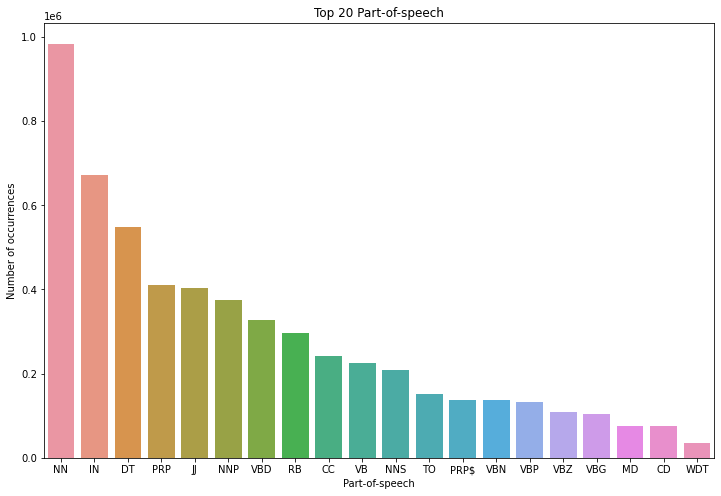

In [6]:
# Plot pos
plt.figure(figsize=(12,8))
ax = sns.barplot(x='index', y='pos', data=pos_df['pos'].value_counts()[:20].reset_index())
ax.set_title('Top 20 Part-of-speech')
ax.set_xlabel('Part-of-speech')
ax.set_ylabel('Number of occurrences')
plt.show()

The part-of-speech that appears the most is noun (NN)

## Tokenize the corpus 
<p>Furthermore, the corpus will be changed into individual words (called tokens). This aims to simplify the pre-processing and subsequent analysis processes. To check the output of our process, we will print the first 20 tokens of "<em>The Adventures of Sherlock Holmes</em>".</p>

In [7]:
# Browse the list containing all the titles
for i in range(len(titles)):
    # Store the index if the title is "The Adventures of Sherlock Holmes"
    if titles[i]=='The Adventures of Sherlock Holmes':
        sherlock = i
print(sherlock)

28


In [8]:
# Define a list of stop words
stoplist = stopwords.words('english')

# Convert the text to lower case 
txts_lower_case = [t.lower() for t in txts]

# Transform the text into tokens 
txts_split = [t.split() for t in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[t for t in txts if t not in stoplist] for txts in txts_split]

# Print the first 20 tokens for the "The Adventures of Sherlock Holmes" book
print(texts[sherlock][:20])

['adventures', 'sherlock', 'holmes', 'arthur', 'conan', 'doyle', 'contents', 'scandal', 'bohemia', 'ii', 'red', 'headed', 'league', 'iii', 'case', 'identity', 'iv', 'boscombe', 'valley', 'mystery']


## Lemmatization of the tokenized corpus
<p>In natural language processing, words like <em>'contents'</em> and <em>'content'</em> are defined as two different words. In fact, these two words have the same meaning. This will dilute the weight given to this concept in the book and potentially bias the results of the analysis.</p> 
<p>To solve this problem, lemmatization is performed. <strong>Lemmatization</strong> is the process to reduce the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.</p> 
<em>'content'</em> is the root word of <em>contents</em>.

In [9]:
# Create an instance of a WordNetLemmatizer object
wordnet_lemmatizer = WordNetLemmatizer()

# For each token of each text, we generated its stem 
texts_lemm = [[wordnet_lemmatizer.lemmatize(token, pos="v") for token in text] for text in texts]
print(texts_lemm[sherlock][:20])

['adventure', 'sherlock', 'holmes', 'arthur', 'conan', 'doyle', 'content', 'scandal', 'bohemia', 'ii', 'red', 'head', 'league', 'iii', 'case', 'identity', 'iv', 'boscombe', 'valley', 'mystery']


## Building bag-of-words

<p>Next, bag-of-words will be built. A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms. A bag-of-words is a representation of text that describes the occurrence of words within a document.</p>
<p>Using the lemmatized tokens and the dictionary, we will create <strong>bag-of-words models</strong> (BoW) of each of our texts. The BoW models will represent our books as a list of all uniques tokens they contain associated with their respective number of occurrences.</p>

In [10]:
# Create a dictionary from the stemmed tokens
dictionary = Dictionary(texts_lemm)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(text) for text in texts_lemm]

# Print the first five elements of the The Adventures of Sherlock Holmes BoW model
print(bows[sherlock][:5])

[(3, 2), (5, 31), (7, 2), (11, 1), (12, 3)]


In [11]:
# View token and id values
list(dictionary.items())[:10]

[(0, '1843'),
 (1, 'abed'),
 (2, 'abels'),
 (3, 'abide'),
 (4, 'abject'),
 (5, 'able'),
 (6, 'abrahams'),
 (7, 'abroad'),
 (8, 'abstinence'),
 (9, 'abundance')]

In the book The Adventures of Sherlock Holmes, the word 'abide' appears 3 times.

## Most common words in The Adventures of Sherlock Holmes
The following are the 10 words that appear most frequently in The Adventure of Sherlock Holmes.

In [12]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "The Adventures of Sherlock Holmes" into a DataFrame
df_bow_origin = pd.DataFrame(bows[sherlock])

# Add the column names to the DataFrame
df_bow_origin.columns = ['index','occurrences']

# Add a column containing the token corresponding to the dictionary index
df_bow_origin['token'] = [dictionary[index] for index in df_bow_origin['index']]
df_bow_origin.head()
# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin.sort_values('occurrences', ascending=False).head(10)

,index,occurrences,token
1612,2524,605,say
2007,3142,465,upon
5825,96558,462,holmes
1300,2020,376,one
348,546,350,come
2128,3321,327,would
1638,2563,325,see
1151,1782,305,man
402,626,286,could
1056,1645,275,know


The words <em>'say'</em>, <em>'upon'</em>, and <em>'holmes'</em> are the 3 words that most often appear in The Adventures of Sherlock Holmes book

## Build a TF-IDF model
<strong>TF-IDF model</strong> (term frequency–inverse document frequency) model defines the importance of each word depending on how frequent it is in this text and how infrequent it is in all the other documents. As a result, a high TF-IDF score for a word will indicate that this word is specific to this text.</p>
### TF-IDF formula
#### For term <em>i</em> in document <em>j</em>:
<img src="https://miro.medium.com/max/319/1*Uucq42G4ntPGJKzI84b3aA.png" alt="TF-IDF Formula" width="360" height="245">

In [13]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for "The Adventures of Sherlock Holmes"
model[bows[sherlock]]

[(3, 0.0005494192471776853),
 (5, 0.0007789605282463311),
 (7, 0.00043909868340766717),
 (11, 0.0006640554796544048),
 (12, 0.00041206443538326396),
 (13, 0.0005779384564408263),
 (16, 0.0010705733654656957),
 (18, 0.00035690415349825497),
 (20, 0.00241504275874217),
 (21, 0.0023996016349114514),
 (22, 0.00042717190258669777),
 (23, 0.0014854114859623314),
 (24, 0.00043909868340766717),
 (26, 0.0010679706091156764),
 (27, 0.0003046965733886492),
 (28, 0.0022819271668837403),
 (30, 0.001402745278523161),
 (34, 0.0005115365894904589),
 (35, 0.00036646622111597506),
 (36, 0.0005836868841676503),
 (37, 0.0009283821787264572),
 (38, 0.004818934093136549),
 (41, 0.0015293905220938508),
 (42, 0.0006867740589721066),
 (43, 0.00037068723793358074),
 (44, 0.0007585801221897092),
 (45, 0.0005067843691042778),
 (47, 0.0010778271110468407),
 (48, 0.0034375514705996127),
 (49, 0.0019318011999318058),
 (50, 0.0002238420192287279),
 (52, 0.0005494192471776853),
 (53, 0.0022589538732421303),
 (54, 0.00

## Result TF-IDF model
<p>The format of those results is hard to interpret for a human. Therefore, we will transform it into a more readable version and display the 10 most specific words for the "The Adventures of Sherlock Holmes" book.</p>

In [14]:
# Convert the tf-idf model for "The Adventures of Sherlock Holmes" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[sherlock]])

# Name the columns of the DataFrame id and score
df_tfidf.columns = ['id', 'score']

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = [dictionary[index] for index in df_tfidf['id']]

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf.sort_values('score', ascending=False).head(10)

,id,score,token
5763,96558,0.915389,holmes
5927,96722,0.192192,sherlock
5023,80365,0.114805,watson
5908,96703,0.091505,rucastle
5817,96612,0.089097,mccarthy
5801,96596,0.075292,lestrade
5663,96458,0.065017,clair
5906,96701,0.050569,roylott
6014,96809,0.048160,windibank
5946,96741,0.045752,stoner


Although the word <em>'say'</em> appears most frequently in Sherlock Holmes books, it has a low TF-IDF score because it also appears frequently in other books. Meanwhile, the word <em>'holmes'</em> or <em>'sherlock'</em> only appears frequently in Sherlock Holmes books.

## Measure of similarity
<p>Now that we have a model associating tokens to how specific they are to each book, we can measure how related to books are between each other.<br>
To this purpose, we will use a measure of similarity called <strong>cosine similarity</strong> and we will visualize the results as a distance matrix, i.e., a matrix showing all pairwise distances between Classic books.</p>
<img src="https://comsysto.files.wordpress.com/2013/02/euclidean_pearson_similarity.png" alt="Cosine Similarity" width="560" height="445">

In [15]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))

# Add the titles of the books as columns and index of the dataframe
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df.head()

,A Christmas Carol in Prose,A Dictionary of Cebuano Visayan,A Doll's House,A History of the Philippines,A Modest Proposal,A Tale of Two Cities,Adventures of Huckleberry Finn,Alice's Adventures in Wonderland,Anthem,Beowulf An Anglo-Saxon Epic Poem,...,The Republic,"The Slang Dictionary Etymological, Historical and Andecdotal",The Souls of Black Folk,The Strange Case of Dr. Jekyll and Mr. Hyde,The Turn of the Screw,The Yellow Wallpaper,Treasure Island,Uncle Tom's Cabin,"Walden, and On The Duty Of Civil Disobedience",War and Peace
A Christmas Carol in Prose,1.000000,0.000543,0.000848,0.001636,0.002620,0.003390,0.004511,0.001038,0.002890,0.001279,...,0.004219,0.007935,0.005160,0.001506,0.004409,0.001970,0.006126,0.003257,0.007927,0.002053
A Dictionary of Cebuano Visayan,0.000543,0.999999,0.000249,0.007354,0.001543,0.001348,0.012526,0.000779,0.003303,0.009391,...,0.005916,0.017105,0.005998,0.000643,0.001492,0.001461,0.010687,0.004124,0.008603,0.002249
A Doll's House,0.000848,0.000249,1.000000,0.000398,0.000608,0.001020,0.001131,0.000332,0.000986,0.000221,...,0.001837,0.001539,0.001213,0.000677,0.005999,0.001137,0.001441,0.001587,0.001624,0.000934
A History of the Philippines,0.001636,0.007354,0.000398,1.000000,0.020736,0.007597,0.018260,0.001879,0.013571,0.010734,...,0.033342,0.039812,0.074710,0.003437,0.007904,0.006225,0.022438,0.011080,0.053004,0.015013
A Modest Proposal,0.002620,0.001543,0.000608,0.020736,1.000000,0.007507,0.012450,0.002469,0.004681,0.005968,...,0.033310,0.037893,0.044244,0.003545,0.008002,0.003701,0.017588,0.008973,0.037694,0.006452


## The book most similar to "The Adventures of Sherlock Holmes"
<p>We now have a matrix containing all the similarity measures between any pair of classic books! We can now use this matrix to quickly extract the information we need, i.e., the distance between one book and one or several others. </p>
<p>As a first step, we will display which books are the most similar to "The Adventures of Sherlock Holmes" more specifically we will produce a bar chart showing all books ranked by how similar they are to The Adventures of Sherlock Holmes.</p>

In [16]:
# Create function to get similar book to 'title'
def recommend(title):
    # Select the column corresponding to the title
    rec = sim_df[title].reset_index()
    rec = rec[rec['index']!=title]
    
    # Sort by ascending scores
    rec = rec.sort_values(by=title, ascending=False).head()
    
    #Visualize the similarity
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x=title, y='index', data=rec.reset_index(), palette='cividis')
    # Modify the axes labels and plot title for a better readability
    plt.xlabel("Cosine distance")
    plt.ylabel("Book Titles")
    plt.title("Most similar books to {}".format(title))

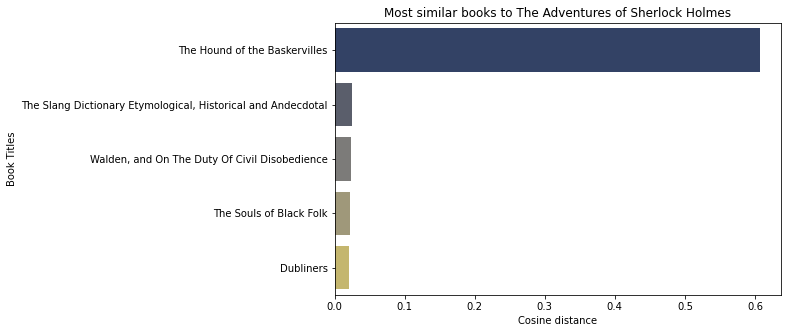

In [17]:
recommend('The Adventures of Sherlock Holmes')

If we are looking for a book similar to The Adventures of Sherlock Holmes, then we will find the book The Hound of the Baskervilles. This makes sense, because these two books were written by Arthur Conan Doyle which tells the story of a detective named Sherlock Holmes.

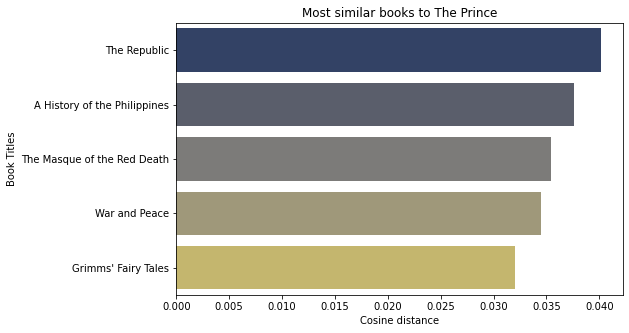

In [18]:
recommend('The Prince')

The Prince by Niccolò Machiavelli is a book that tells about politics, this book discusses the acquisition, preservation and use of political power in the western world. If we are looking for a book that is similar to The Prince, the recommended book is The Republic, A Histor of the Philippines, The Masque of the Red Death, War and Peace, and Grimmms' Fairy Tales. All these recommended books have anything to do with politics or power.